# Titanic

# Dataset Investigation

In [2]:
# This notebook is written to work with python 3.x
# Import necessary packages

import pandas as pd
import numpy as np

#visualization packages
import seaborn as sns 
import matplotlib.pyplot as plt

### 1. Loading Data

In [3]:
# read files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [5]:
# combine both for analysis
combined = [train, test]
data = pd.concat(combined)

In [6]:
# add a field to distinguish between test and train set to split it back when needed
# 0 for train, 1 for test 
data['Set'] = np.where(data['Survived'].isnull(),'1','0')

In [7]:
data.shape

(1309, 13)

### 2. Data exploration

In [8]:
#1) identifiy the predictor and the target
# Target: Survived
# Predictor: all other varibles 
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Set
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Set            1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


Conclusions:
    1. As we can notice: age, cabin, fare and embarked have some missing values
    2. Fields have different data types, including int, float, string, and categorical.

#### Uni-variate analysis

In [10]:
# 2) analyze continous variables (numeric)
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


Conclusions:
    1. ~38% survival rate. See the mean of the varible Survived
    2. The majority of passengers fall in the age range between months - 38 years 
    3. Fare is usually low, except for some passengers where it's been 512.
    4. A standard deviation of ~50 for Fare, tells us that the fare is highly spreaded out from the mean

In [11]:
# 3) analyze categorical variables
data.describe(include = ['O'])

,Cabin,Embarked,Name,Sex,Ticket,Set
count,295,1307,1309,1309,1309,1309
unique,186,3,1307,2,929,2
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343,0
freq,6,914,2,843,11,891


Conclusions:
    1. Name is unique accross all passengers, expect for one it's been duplicated
    2. More than half of the passengers were males (843 out of 1309)
    3. More than two passengers can share the same cabin, and the Titanic had 186 different cabins
    4. Embarked has 3 values, S port is the most used one.
    5. Tickets are not unique, which means that more than one passenger can share the same ticket number

In [12]:
data[data['Name'] == 'Kelly, Mr. James']
# different ticket numbers, different age, different sets

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Set
696,44.0,NaN,S,8.0500,"Kelly, Mr. James",0,697,3,male,0,0.0,363592,0
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC953F03C8>]],
      dtype=object)

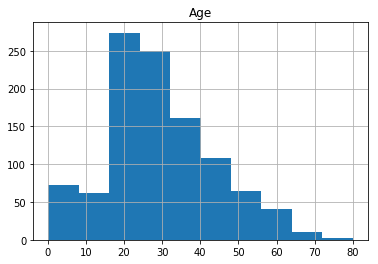

In [7]:
# let's analyze the variable 'Age' using histogram
data.hist(column='Age')

Conclusions:
    1. This further supports our previous conclusion, most of the passengers were between 18~40. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC954095F8>]],
      dtype=object)

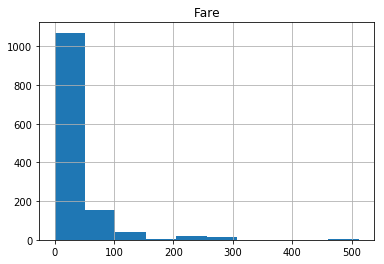

In [8]:
# let's analyze the variable 'Fare' using histogram
data.hist(column='Fare')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC957ADE80>]],
      dtype=object)

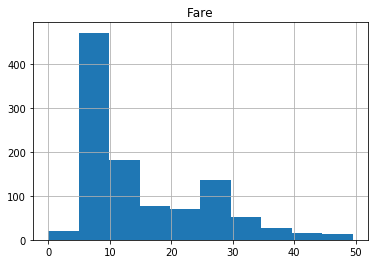

In [9]:
# temproray, might be deleted
temp = data.copy()
temp = temp[temp['Fare']<50]
temp.hist(column='Fare')

Conclusions:
    1. This further supports our previous conclusion, the fare is usually low, except for some passengers.

#### Multi-variate analysis

In [ ]:
#  We want to analyze the relationship between the predictors and the target. 
#  Why? to drop any column that is not needed in the coming phases (ML phase)

In [10]:
data[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
data[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [12]:
data[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Conclusions:
    1. Females had higher chance to survive
    2. Passengers on Class 1 survived more

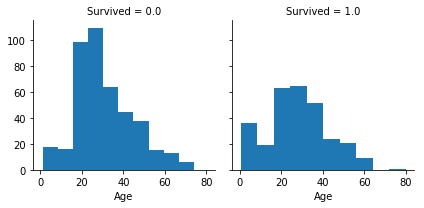

In [13]:
# analyze Age with Survived rate
age_survived = sns.FacetGrid(data, col='Survived')
age_survived.map(plt.hist, 'Age')

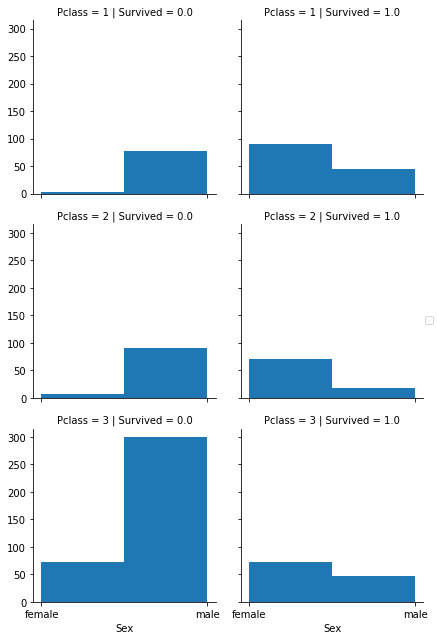

In [14]:
grid = sns.FacetGrid(data, col='Survived', row = 'Pclass')
grid.map(plt.hist,'Sex', bins=2)
grid.add_legend();

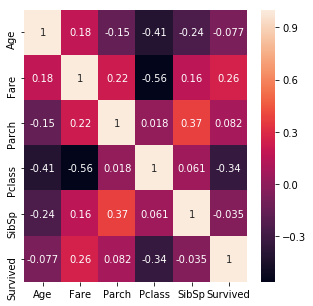

In [15]:
#analysis of correlation
plt.figure(figsize=(5,5))
sns.heatmap(data[['Age','Fare','Parch','Pclass','SibSp','Survived']].corr(), annot=True)

Conclusions:
    1. age and class
    2. fare and class
    3. class and survived 

### 3. Data Cleansing

#### 1) Handling missing values.
As stated before, we have missing values in age, embarked, fare and cabin. 

    1. For age, we've seen that it has strong relationship with the survival chance. So, it must be kept.(i.e. we cannot drop the column, we have to handle the missing values with the mean or the median)
    2. For the port value, we will replace by the most frequent value. 
    3. For the fare, since we only have one missing value, replace it with the most frequent one.

#### 2) Dropping unneeded cols

    1. Cabin --> too many nulls
    2. Ticket --> almost unique
    3. PassengerId --> unique
    4. Name --> name isn't needed, but what about the title?

In [16]:
# Check null values in each column
print(data.isnull().sum())

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Set               0
dtype: int64


In [17]:
# We will fill the missing age values by the mean or the median
# but first, let's see the distribution of the age before and after filling the age with mean and median
temp = data.copy()
temp['Age'] = temp['Age'].fillna(temp['Age'].mean())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC95C8B5C0>]],
      dtype=object)

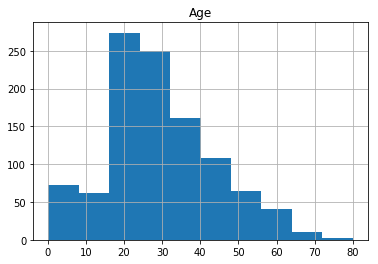

In [18]:
data.hist(column = 'Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC95D1C128>]],
      dtype=object)

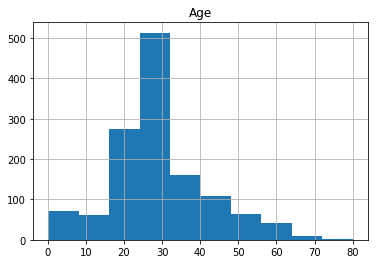

In [19]:
temp.hist(column = 'Age')

As we can notice, the tremendous peak in the new distribution of the age. This is because the number of records with missing values was large.

In [20]:
# Since the number of records with null port value is small, 
# We will fill them by the most frequent port value which is S
data = temp
data['Embarked'] = data['Embarked'].fillna('S')
data['Fare'] = data['Fare'].fillna(data['Fare'].mode()[0])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Set            1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [22]:
# let's drop PassengerId, Cabin, Ticket
data.drop(['Cabin','PassengerId','Ticket'], axis = 1, inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Set         1309 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 112.5+ KB


#### Handling Outliers

In [24]:
data.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.276193,0.385027,2.294882,0.498854,0.383838
std,12.883193,51.743584,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,29.881138,14.454200,0.000000,3.000000,0.000000,0.000000
75%,35.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


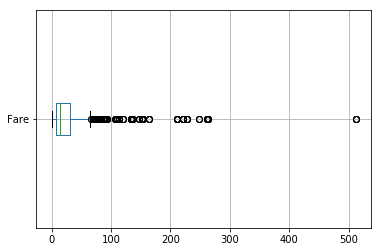

In [25]:
data.boxplot(['Fare'], vert = False)

In [26]:
data[data['Fare']== data['Fare'].max()]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Set
258,35.0,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1.0,0
679,36.0,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1.0,0
737,35.0,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1.0,0
343,58.0,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,NaN,1


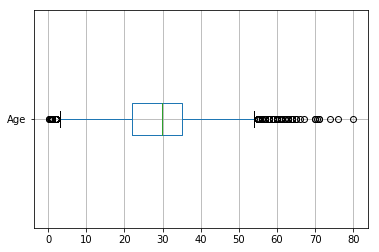

In [27]:
data.boxplot(['Age'], vert = False)

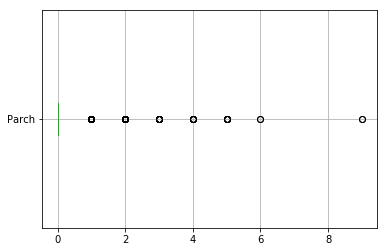

In [28]:
data.boxplot(['Parch'], vert = False)

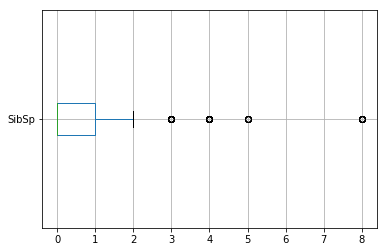

In [29]:
data.boxplot(['SibSp'], vert = False)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Set         1309 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 112.5+ KB


Conclusions:
    1. Age has some extreme values, though it's realistic and doesn't require imputation.
    2. Fare has an outlier at 512, but there're 4 passengers having the same fare, and all in class 1 which make sense. So, it's not an error.
    3. Both ParCh and SibSp are okay.

### 4. Features Engineering

In [31]:
# before dropping the name col, let's benefit from it.
data.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Set
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,0


In [32]:
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [33]:
data.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Set,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,0,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,0,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,0,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,0,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,0,Mr


In [34]:
data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [35]:
data['Title'].replace(['Master','Don','Rev','Major','Col','Dona','Capt','the Countess','Jonkheer','Dr'],'Others',inplace=True)
data['Title'].replace(['Lady','Miss','Mlle'],'Ms',inplace=True)
data['Title'].replace(['Sir'],'Mr',inplace=True)
data['Title'].replace(['Mme'],'Mrs',inplace=True)

In [36]:
data.Title.unique()

array(['Mr', 'Mrs', 'Ms', 'Others'], dtype=object)

In [37]:
# now we can drop the name col
data.drop('Name',axis=1, inplace=True)

In [38]:
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Set,Title
0,22.0,S,7.2500,0,3,male,1,0.0,0,Mr
1,38.0,C,71.2833,0,1,female,1,1.0,0,Mrs
2,26.0,S,7.9250,0,3,female,0,1.0,0,Ms
3,35.0,S,53.1000,0,1,female,1,1.0,0,Mrs
4,35.0,S,8.0500,0,3,male,0,0.0,0,Mr


In [ ]:
data.info()

In [39]:
# split the data back into training and testing
train = data[data['Set'] == '0']
test = data[data['Set'] == '1']

In [40]:
#validation
print(train.shape,test.shape)

(891, 10) (418, 10)


In [41]:
train = train.drop('Set',axis = 1)
test = test.drop('Set',axis = 1)

# Machine Learning 

### Scikit-Learn
http://scikit-learn.org/stable/index.html


In [42]:
# Import necessary packages
import random 

#Preprocessing 
from sklearn.preprocessing import StandardScaler

#Classification Models  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation Metrics 
from sklearn.model_selection import cross_val_score, validation_curve

### 1. Preprocessing-2

#### Identify features and target

In [54]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

#### Encoding Categorical Variables 

In [55]:
# Convert categorical variables to dummy variables (encoding)
tmp_dummies = pd.get_dummies(X[['Embarked', 'Sex', 'Title']], drop_first=True)
display(tmp_dummies.head())

# Join train data with encoded columns, and assign to a new variable X
X = pd.concat([X, tmp_dummies], axis=1)
display(X.head())

# Remove non-encoded categorical columns
X = X.drop(['Embarked', 'Sex', 'Title'], axis=1)
display(X.head())

,Embarked_Q,Embarked_S,Sex_male,Title_Mrs,Title_Ms,Title_Others
0,0,1,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,1,0
3,0,1,0,1,0,0
4,0,1,1,0,0,0


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title,Embarked_Q,Embarked_S,Sex_male,Title_Mrs,Title_Ms,Title_Others
0,22.0,S,7.2500,0,3,male,1,Mr,0,1,1,0,0,0
1,38.0,C,71.2833,0,1,female,1,Mrs,0,0,0,1,0,0
2,26.0,S,7.9250,0,3,female,0,Ms,0,1,0,0,1,0
3,35.0,S,53.1000,0,1,female,1,Mrs,0,1,0,1,0,0
4,35.0,S,8.0500,0,3,male,0,Mr,0,1,1,0,0,0


,Age,Fare,Parch,Pclass,SibSp,Embarked_Q,Embarked_S,Sex_male,Title_Mrs,Title_Ms,Title_Others
0,22.0,7.2500,0,3,1,0,1,1,0,0,0
1,38.0,71.2833,0,1,1,0,0,0,1,0,0
2,26.0,7.9250,0,3,0,0,1,0,0,1,0
3,35.0,53.1000,0,1,1,0,1,0,1,0,0
4,35.0,8.0500,0,3,0,0,1,1,0,0,0


#### Normalizing Data (Remove mean and scale to unit variance) 

In [56]:
scalar = StandardScaler() 
X.loc[:,:] = scalar.fit_transform(X)
X.head()

,Age,Fare,Parch,Pclass,SibSp,Embarked_Q,Embarked_S,Sex_male,Title_Mrs,Title_Ms,Title_Others
0,-0.595254,-0.502445,-0.473674,0.827377,0.432793,-0.307562,0.615838,0.737695,-0.405840,-0.513644,-0.271098
1,0.635996,0.786845,-0.473674,-1.566107,0.432793,-0.307562,-1.623803,-1.355574,2.464027,-0.513644,-0.271098
2,-0.287441,-0.488854,-0.473674,0.827377,-0.474545,-0.307562,0.615838,-1.355574,-0.405840,1.946875,-0.271098
3,0.405137,0.420730,-0.473674,-1.566107,0.432793,-0.307562,0.615838,-1.355574,2.464027,-0.513644,-0.271098
4,0.405137,-0.486337,-0.473674,0.827377,-0.474545,-0.307562,0.615838,0.737695,-0.405840,-0.513644,-0.271098


#### Repeat for Test Data

In [58]:
X_test = test.drop(['Survived'], axis=1)

# Convert categorical variables to dummy variables (encoding)
tmp_dummies = pd.get_dummies(X_test[['Embarked', 'Sex', 'Title']], drop_first=True)

# Join train data with encoded columns, and assign to a new variable train_p
X_test = pd.concat([X_test, tmp_dummies], axis=1)

# Remove non-encoded categorical columns
X_test = X_test.drop(['Embarked', 'Sex', 'Title'], axis=1)

X_test.loc[:,:] = scalar.transform(X_test)

### 2. Model Selection

#### Evaluate and compare different base models  

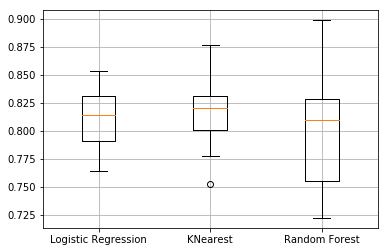

In [59]:
random.seed(0)

# Initializing models 
logistic_regression =  LogisticRegression()
k_nearest =  KNeighborsClassifier()
random_forest =  RandomForestClassifier(random_state=0)

# Calculate cross validation scores for each model 
logistic_regression_score = cross_val_score(logistic_regression, X, y, cv=10)
k_nearest_score = cross_val_score(k_nearest, X, y, cv=10)
random_forest_score = cross_val_score(random_forest, X, y, cv=10)

#Plot the scores 
plt.boxplot([logistic_regression_score, k_nearest_score, random_forest_score], positions=[1,2,3])
plt.xticks([1,2,3], ['Logistic Regression', 'KNearest', 'Random Forest'])
plt.grid()
plt.show()

### 3. Hyper-Parameters Tuning 

#### K-Nearest Neighbor: Tune The Hyper-Parameters Using Validation Curve

In [60]:
param_range = [i+1 for i in range(15)]
train_scores, vald_scores = validation_curve(k_nearest, X, y, 'n_neighbors', param_range, cv=5)

In [61]:
#Compute means and std 
train_mean, train_std = train_scores.mean(axis=1), train_scores.std(axis=1)
vald_mean, vald_std = vald_scores.mean(axis=1), vald_scores.std(axis=1)

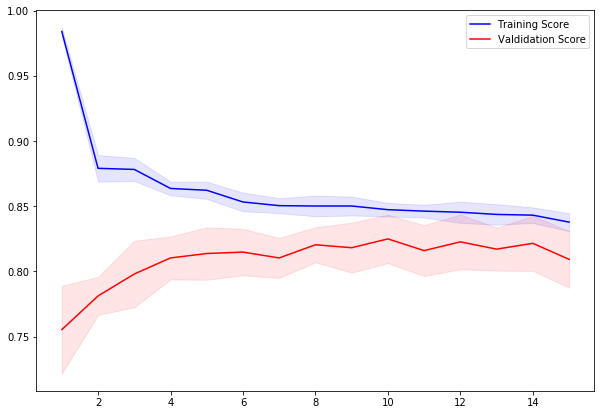

In [62]:
#Plotting 
plt.figure(figsize=(10,7))

plt.plot(param_range, train_mean, c='b')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, color='b', alpha=0.1)

plt.plot(param_range, vald_mean, c='r')
plt.fill_between(param_range, vald_mean+vald_std, vald_mean-vald_std, color='r', alpha=0.1)


plt.legend(['Training Score', 'Valdidation Score'])

In [63]:
best_n_neighbors = 10 

### 4. Model Training and Predictions 

In [64]:
#Initialize model with selected hyper-parameters
k_nearest =  KNeighborsClassifier(n_neighbors=best_n_neighbors)

#Train model on the entire training data 
k_nearest.fit(X, y)

#Get predictions for test data
pred_test = k_nearest.predict(X_test).astype(int)

In [65]:
test_orig = pd.read_csv('test.csv')
predictions_df = pd.DataFrame({'PassengerId':test_orig['PassengerId'].astype(str), 'Survived':pred_test.astype(int)})

In [66]:
predictions_df.to_csv('Titanic_B_Submission.csv', index=False)